dementia    2465
MCI         1234
VMD          718
Normal       328
Name: Group, dtype: int64


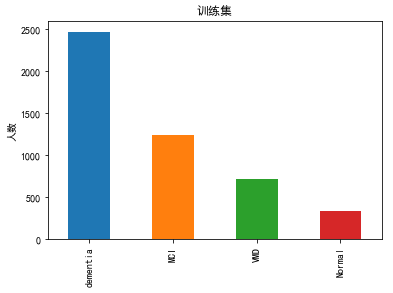

dementia    265
MCI         113
VMD          98
Normal       51
Name: Group, dtype: int64


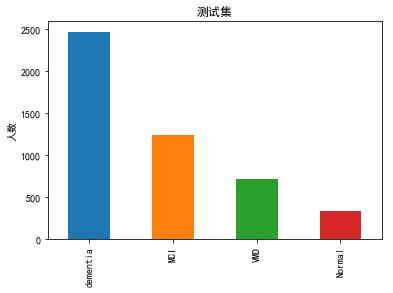

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

#读入文件
path1='data\\train_relief.csv'
path2='data\\test_relief.csv'
path3='data\\train_infor.csv'
path4='data\\test_infor.csv'
path5='data\\train_rf.csv'
path6='data\\test_rf.csv'
#path7='data\\train1.csv'
#path8='data\\test1.csv'
#path9='data1\\train3.csv'
#path10='data1\\test3.csv'

data_train=pd.read_csv(path5)
#data_train=data_train.fillna(data_train.mean())
data_test=pd.read_csv(path6)
#data_test=data_test.fillna(data_test.mean())

#查看类别分布情况
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False   #用来正常显示负号

print(data_train['Group'].value_counts())
data_train.Group.value_counts().plot(kind='bar')
plt.title(u'训练集')
plt.ylabel(u'人数')
plt.show()

print(data_test['Group'].value_counts())
data_train.Group.value_counts().plot(kind='bar')
plt.title(u'测试集')
plt.ylabel(u'人数')
plt.show()

In [67]:
X1 = data_train.drop("Group", axis=1) #获取训练集特征  
y1 = data_train["Group"]  #获取训练集标签列 
X2 = data_test.drop("Group", axis=1) #获取测试集特征  
y2 = data_test["Group"]  #获取测试集标签列

In [68]:
#模型训练
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, auc, \
            classification_report, recall_score, precision_recall_curve

random_state = 2018


def get_best_model(X1,y1,random_state):

    cv = StratifiedKFold(n_splits =5, shuffle=True, random_state = random_state)

    #训练神经网络模型
    mlp = MLPClassifier(random_state = random_state) 
    scoring = {'Recall': make_scorer(recall_score),
               'f1_score': make_scorer(f1_score)
              }

    params = { 'hidden_layer_sizes':[3],
              'activation':['identity', 'logistic', 'tanh', 'relu'],
              'solver':['lbfgs', 'sgd', 'adam'],
              'learning_rate':['constant', 'invscaling', 'adaptive']
              
                 }

    grid_clf = GridSearchCV(estimator = mlp, param_grid = params, cv = cv, n_jobs=-1, verbose=4)
    grid_clf.fit(X1, y1)
    return grid_clf   
grid_clf = get_best_model(X1,y1,random_state)
best_mlp = grid_clf.best_estimator_
print(grid_clf.best_estimator_)
print(grid_clf.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  3.9min finished


MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=3, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=2018,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
{'activation': 'identity', 'hidden_layer_sizes': 3, 'learning_rate': 'constant', 'solver': 'lbfgs'}


In [69]:
##得到的最优模型评估训练集
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, auc, classification_report, recall_score, precision_recall_curve

grid_clf = grid_clf.best_estimator_
target_name = ['Normal','MCI','VMD','dementia']
predicted = cross_val_predict(grid_clf, X1, y1, cv=5)
metrics.accuracy_score(y1, predicted) 
#神经网络模型评估结果 加权重结果类别不平衡问题
print('mlp model准确度分数:',accuracy_score(y1, predicted)) #准确度分类得分
print('mlp model混淆矩阵\n',confusion_matrix(y1,predicted)) #混淆矩阵
print("mlp model召回率",recall_score(y1,predicted,average='macro'))#宏查全率
print("mlp model分类报告\n",classification_report(y1,predicted,target_names = target_name))#分类报告

mlp model准确度分数: 0.7905163329820865
mlp model混淆矩阵
 [[ 949  134  112   39]
 [  75  252    1    0]
 [ 286    8  259  165]
 [  57    0  117 2291]]
mlp model召回率 0.7068681104364145
mlp model分类报告
              precision    recall  f1-score   support

     Normal       0.69      0.77      0.73      1234
        MCI       0.64      0.77      0.70       328
        VMD       0.53      0.36      0.43       718
   dementia       0.92      0.93      0.92      2465

avg / total       0.78      0.79      0.78      4745



In [70]:
#得到的最优模型评估测试集
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, auc, \
            classification_report, recall_score, precision_recall_curve

#grid_clf = grid_clf.best_estimator_
target_name = ['Normal','MCI','VMD','dementia']

def get_RF_score(grid_clf,target_name):
    
    y_pred_RFC= grid_clf.fit(X1,y1).predict(X2)
    
    #神经网络模型评估结果 加权重结果类别不平衡问题
    print('mlp model准确度分数:',accuracy_score(y2, y_pred_RFC)) #准确度分类得分
    print('mlp model混淆矩阵\n',confusion_matrix(y2,y_pred_RFC)) #混淆矩阵
    print("mlp model召回率",recall_score(y2,y_pred_RFC,average='macro'))#宏查全率
    print("mlp model分类报告\n",classification_report(y2,y_pred_RFC,target_names = target_name))#分类报告

    
get_RF_score(grid_clf,target_name)

mlp model准确度分数: 0.7760910815939279
mlp model混淆矩阵
 [[ 84  12  11   6]
 [  7  43   1   0]
 [ 34   1  36  27]
 [  4   0  15 246]]
mlp model召回率 0.7205372280820828
mlp model分类报告
              precision    recall  f1-score   support

     Normal       0.65      0.74      0.69       113
        MCI       0.77      0.84      0.80        51
        VMD       0.57      0.37      0.45        98
   dementia       0.88      0.93      0.90       265

avg / total       0.76      0.78      0.76       527



In [73]:
MLPClassifier?

Init signature: MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
Docstring:     
Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic
gradient descent.

.. versionadded:: 0.18

Parameters
----------
hidden_layer_sizes : tuple, length = n_layers - 2, default (100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default 'relu'
    Activation function for the hidden layer.

    - 'identity', no-op activation, useful to implement linear bottleneck,
      returns f(x) = x

    - 'logistic', the logistic sigmoid fu